In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Requests
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
SRGAN_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
%%time
model = hub.load(SRGAN_MODEL_PATH)

CPU times: user 6.27 s, sys: 511 ms, total: 6.78 s
Wall time: 7.14 s


In [ ]:
def download_image(url):
    """
    Download image from URL
    """
    content = requests.get(url).content
    image_array = np.asarray(bytearray(content), dtype=np.uint8)
    image = cv2.cvtColor(cv2.imdecode(image_array, -1), cv2.COLOR_BGR2RGB)
    
    return image

In [ ]:
def plot_image(image):
    plt.figure(figsize=(10,10))
    plt.title(image.shape)
    plt.imshow(image)
    plt.show()

In [ ]:
def preprocess_image(image):
    """
    Pre process image for model
    """
    image_size = (tf.convert_to_tensor(test_image.shape[:-1]) // 4) * 4
    cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, image_size[0], image_size[1])
    new_image = tf.cast(cropped_image, tf.float32)
    
    return tf.expand_dims(new_image, 0)

In [ ]:
def run(image):
    """
    Run super resolution model
    """
    preprocessed_image = preprocess_image(image)
    new_image = model(preprocessed_image)
    return tf.squeeze(new_image) / 255.0

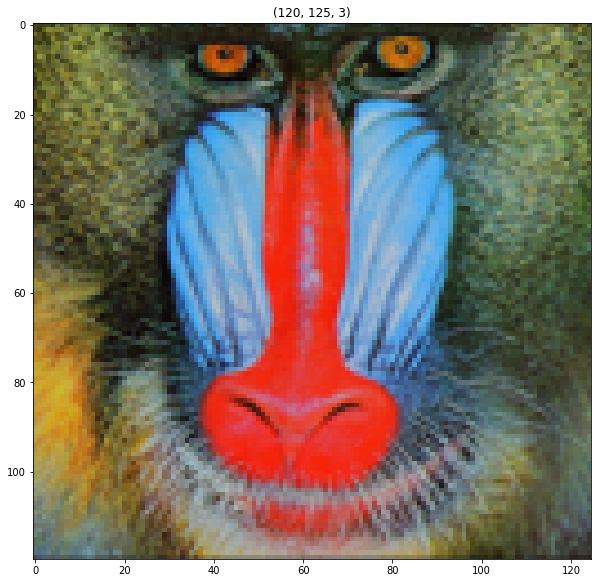

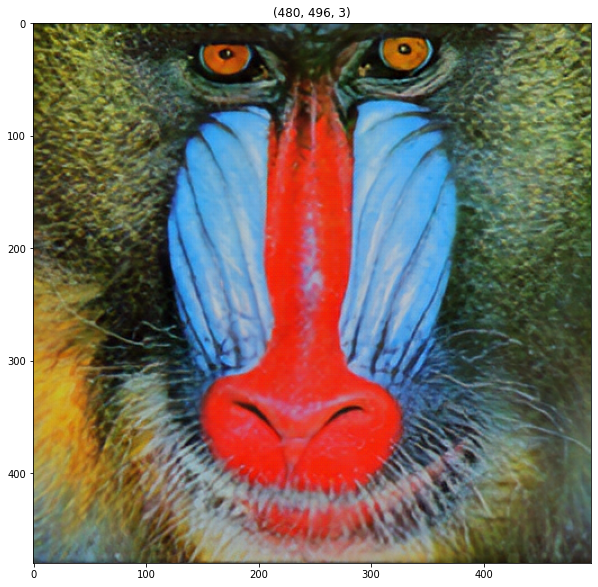

CPU times: user 7.48 s, sys: 214 ms, total: 7.7 s
Wall time: 4.59 s


In [ ]:
%%time
url = "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png"
test_image = download_image(url)
plot_image(test_image)
Super_image = run(test_image)
plot_image(Super_image)